In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm 
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [177]:
students = pd.read_csv('mark-sheet.csv', delimiter=',')

In [152]:
students.head()

,maths,science,skill
0,50,70,1
1,30,10,0
2,69,60,0
3,76,84,2
4,48,55,0


In [153]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
maths      30 non-null int64
science    30 non-null int64
skill      30 non-null int64
dtypes: int64(3)
memory usage: 800.0 bytes


In [154]:
students.isnull()

,maths,science,skill
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [155]:
students.isnull().sum()

maths      0
science    0
skill      0
dtype: int64

## Preprocessing Data

In [156]:
bins = (-1, 0.5, 1.5, 3)
group_names = ['bad', 'average', 'good']
students['skill'] = pd.cut(students['skill'], bins = bins, labels = group_names)

In [157]:
students['skill'].value_counts()

bad        14
good        8
average     8
Name: skill, dtype: int64

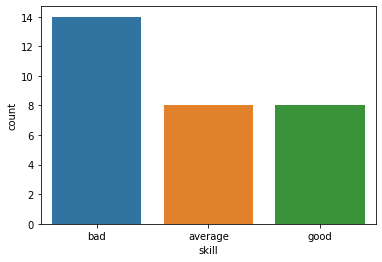

In [158]:
sns.countplot(students['skill'])

### Now seperate the dataset as response variable and feature variables

In [178]:
X = students.drop('skill', axis=1)
y = students['skill']

In [179]:
y

0     1
1     0
2     0
3     2
4     0
5     0
6     0
7     2
8     2
9     2
10    1
11    1
12    0
13    0
14    0
15    1
16    0
17    1
18    0
19    0
20    0
21    1
22    0
23    0
24    2
25    2
26    2
27    1
28    1
29    2
Name: skill, dtype: int64

### Train and Test Splitting of data

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train

,maths,science
18,55,65
16,52,69
28,72,78
5,45,48
8,89,91
13,65,62
2,69,60
21,70,58
23,15,20
11,78,72


### Applying Standard scaling to get optimized result

In [162]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Random FOrest Classifier

In [163]:
rfc = RandomForestClassifier(n_estimators=10)

In [164]:
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [165]:
pred_rfc

array(['average', 'average', 'bad', 'average', 'good', 'bad'],
      dtype=object)

### Let's see how our model Performs

In [166]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

     average       0.67      0.67      0.67         3
         bad       0.50      0.50      0.50         2
        good       1.00      1.00      1.00         1

    accuracy                           0.67         6
   macro avg       0.72      0.72      0.72         6
weighted avg       0.67      0.67      0.67         6

[[2 1 0]
 [1 1 0]
 [0 0 1]]


## Accuracy Scorer

In [167]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)
cm

0.6666666666666666

In [168]:
students.head(20)

,maths,science,skill
0,50,70,average
1,30,10,bad
2,69,60,bad
3,76,84,good
4,48,55,bad
5,45,48,bad
6,63,60,bad
7,92,95,good
8,89,91,good
9,84,75,good


In [175]:
Xnew = [[55, 71]]

In [176]:
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array(['bad'], dtype=object)